# Core-core relationships in array compendium

This notebook performs the same stability analysis using the *P. aeruginosa* array compendium that is described in ____.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import random
import scipy.stats
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
from scripts import utils, paths

random.seed(1)

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# Params
most_percent = 0.05
least_percent = 0.05

In [3]:
"""
# Output filenames
pao1_similarity_dist_filename = "pao1_similarity_scores_dist_spell.svg"
pa14_similarity_dist_filename = "pa14_similarity_scores_dist_spell.svg"

# Files containing genes with highest and lowest transcriptional similarity scores high and low
pao1_similarity_scores_filename = "pao1_similarity_scores_spell.tsv"
pa14_similarity_scores_filename = "pa14_similarity_scores_spell.tsv"
"""

'\n# Output filenames\npao1_similarity_dist_filename = "pao1_similarity_scores_dist_spell.svg"\npa14_similarity_dist_filename = "pa14_similarity_scores_dist_spell.svg"\n\n# Files containing genes with highest and lowest transcriptional similarity scores high and low\npao1_similarity_scores_filename = "pao1_similarity_scores_spell.tsv"\npa14_similarity_scores_filename = "pa14_similarity_scores_spell.tsv"\n'

In [4]:
# Import correlation matrix
array_expression_filename = paths.ARRAY_COMPENDIUM_GE
array_metadata_filename = paths.ARRAY_COMPENDIUM_METADATA

array_expression = pd.read_csv(
    array_expression_filename, sep="\t", index_col=0, header=0
).T
array_metadata = pd.read_csv(array_metadata_filename, sep="\t", index_col=0, header=0)

In [5]:
print(array_expression.shape)
array_expression.head()

(950, 5549)


,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5561,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570
05_PA14000-4-2_5-10-07_S2.CEL,9.620090,10.575783,9.296287,9.870074,8.512268,7.903954,7.039473,10.209826,9.784684,5.485688,...,7.740609,9.730384,10.516061,10.639916,9.746849,5.768592,9.224442,11.512176,12.529719,11.804896
54375-4-05.CEL,9.327996,10.781977,9.169988,10.269239,7.237999,7.663758,6.855194,9.631573,9.404465,5.684067,...,7.127736,9.687607,10.199612,9.457152,9.318372,5.523898,7.911031,10.828271,11.597643,11.268520
AKGlu_plus_nt_7-8-09_s1.CEL,9.368599,10.596248,9.714517,9.487155,7.804147,7.681754,6.714411,9.497601,9.523126,5.766331,...,7.343241,9.717993,10.419979,10.164667,10.305005,5.806817,8.575730,10.858250,12.255953,11.309662
anaerobic_NO3_1.CEL,9.083292,9.897050,8.068471,7.310218,6.723634,7.141148,8.492302,7.740717,7.640251,5.267993,...,7.374740,8.287819,9.437053,8.936576,9.418147,5.956482,7.481406,7.687985,9.205525,9.395773
anaerobic_NO3_2.CEL,8.854901,9.931392,8.167126,7.526595,6.864015,7.154523,8.492109,7.716687,7.268094,5.427256,...,7.425398,8.588969,9.313851,8.684602,9.272818,5.729479,7.699086,7.414436,9.363494,9.424762


In [6]:
print(array_metadata.shape)
array_metadata.head()

(1217, 17)


,sample_name,ml_data_source,description,nucleic_acid,medium,genotype,od,growth_setting_1,growth_setting_2,strain,temperature,treatment,additional_notes,variant_phenotype,abx_marker,biotic_int_lv_2,biotic_int_lv_1
experiment,,,,,,,,,,,,,,,,,
E-GEOD-46947,GSM1141730 1,GSM1141730_PA01_ZnO_PZO_.CEL,Pseudomonas aeruginosa PAO1 LB aerated 5 h wi...,RNA,LB,NaN,NaN,planktonic,aerated,PAO1,37.0,1 mM ZnO nanoparticles,Grown for 5h,NaN,NaN,NaN,NaN
E-GEOD-46947,GSM1141729 1,GSM1141729_PA01_none_PC_.CEL,Pseudomonas aeruginosa PAO1 LB aerated 5 h,RNA,LB,NaN,NaN,planktonic,aerated,PAO1,37.0,NaN,Grown for 5h,NaN,NaN,NaN,NaN
E-GEOD-65882,GSM1608059 1,GSM1608059_Planktonic_1.CEL,PAO1 WT. Planktonic. Rep1,RNA,PBM plus 1 g / L glucose.,WT,0.26,Planktonic,Aerated,PAO1,37.0,NaN,Grown shaking at 200rpm,NaN,NaN,NaN,NaN
E-GEOD-65882,GSM1608060 1,GSM1608060_Planktonic_2.CEL,PAO1 WT. Planktonic. Rep2,RNA,PBM plus 1 g / L glucose.,WT,0.26,Planktonic,Aerated,PAO1,37.0,NaN,Grown shaking at 200rpm,NaN,NaN,NaN,NaN
E-GEOD-65882,GSM1608061 1,GSM1608061_Planktonic_3.CEL,PAO1 WT. Planktonic. Rep3,RNA,PBM plus 1 g / L glucose.,WT,0.26,Planktonic,Aerated,PAO1,37.0,NaN,Grown shaking at 200rpm,NaN,NaN,NaN,NaN


## Make PAO1, PA14 array compendia

In [7]:
## TO DO
# Look into getting samples with strain containing "PAO1" as a substring to expand number of samples
# Update comments in notebook about where data came from
# Update comments in notebook about core genes

In [8]:
# Set "ml_data_source" (which corresponds to the sample ids in our expression matrix) as the index
array_metadata.set_index("ml_data_source", inplace=True)

In [9]:
# Select and separate between samples that are using PAO1 strain and those using PA14 strain
pao1_sample_ids = array_metadata.query("strain=='PAO1'").index.dropna()
pa14_sample_ids = array_metadata.query("strain=='PA14'").index.dropna()

In [10]:
print(len(pao1_sample_ids))
print(len(pa14_sample_ids))

527
135


In [11]:
# Make PAO1, PA14 array compendia
pao1_sample_ids_shared = set(array_expression.index).intersection(pao1_sample_ids)
pa14_sample_ids_shared = set(array_expression.index).intersection(pa14_sample_ids)

pao1_array_compendium = array_expression.loc[pao1_sample_ids_shared]
pa14_array_compendium = array_expression.loc[pa14_sample_ids_shared]

In [12]:
print(pao1_array_compendium.shape)
pao1_array_compendium.head()

(436, 5549)


,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5561,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570
GSM356959.CEL,7.831176,8.888008,7.628324,8.327866,7.510601,7.282403,8.297633,8.074435,7.835853,6.326645,...,7.026707,8.887717,8.432394,9.383928,8.439319,8.354865,8.812926,10.549417,9.767572,6.856875
GSM573327.CEL,9.828436,10.622570,8.445784,9.268213,7.861100,7.904047,9.459565,8.119346,7.659150,5.391863,...,6.709793,8.872446,8.903135,8.473775,8.820738,5.407110,7.325192,8.718344,9.811456,8.713361
GSM738264.CEL,8.448770,9.626820,7.385247,8.337985,6.836922,7.052397,8.695432,7.568807,6.081330,5.202479,...,7.382325,8.709510,8.273531,7.564287,9.309100,5.857080,6.592029,8.596912,9.685516,10.272361
GSM854798.CEL,8.141903,8.500719,9.583403,8.220238,7.968872,6.599308,7.611115,7.683929,7.161676,9.025246,...,9.256157,10.444852,9.379144,7.608174,8.887947,6.028305,8.608385,7.320712,13.145665,12.287916
GSM738263.CEL,8.199297,9.296063,7.319120,8.186714,6.751955,7.071101,9.066277,7.364962,6.070027,5.237654,...,6.931656,8.878709,7.913382,7.499154,8.716736,6.117004,6.883521,8.612266,9.288379,9.852740


In [13]:
print(pa14_array_compendium.shape)
pa14_array_compendium.head()

(99, 5549)


,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5561,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570
Pae_noFe_11.CEL,7.790687,8.190760,7.580155,6.792974,6.591583,8.306807,7.530801,6.778851,7.108261,5.354359,...,8.989196,7.475966,7.294207,9.569809,8.272383,6.291103,6.711106,8.344328,9.187512,10.640756
GSM591624.CEL,8.261934,10.456280,7.374900,8.390597,7.081823,6.977250,7.949154,7.993091,7.198635,5.787675,...,6.481081,9.175091,9.496421,8.135078,9.026133,5.835051,7.477615,9.284945,9.813574,9.628016
GSM462353.CEL,9.216926,10.285517,9.233304,8.841665,7.638163,7.457721,7.209868,8.818182,8.504049,5.443283,...,8.218436,9.806456,10.362544,10.402226,9.795384,5.609057,8.392721,11.174594,11.973593,10.789994
GSM1206645_WT-CHO-1.CEL,8.880273,11.008027,8.533665,9.204062,7.260366,8.389066,8.119364,8.021955,7.757232,5.355534,...,8.703210,7.984877,10.959859,8.256356,8.136450,6.995742,6.527662,9.063525,11.653815,9.992327
GSM252501.CEL,9.227238,10.599580,8.497225,8.441499,7.268252,7.665157,8.333018,8.631129,8.363320,5.333992,...,8.348068,8.778397,10.513588,10.277491,9.080569,5.860684,7.966813,11.191529,12.462472,11.523245


## Calculate correlation matrix

In [14]:
num_SVs = 100

In [15]:
# Transpose compendia to be gene x sample
# Here we're interested in how genes cluster
pao1_array_compendium_T = pao1_array_compendium.T
pa14_array_compendium_T = pa14_array_compendium.T

In [16]:
# log transform data
pao1_array_compendium_log10 = np.log10(1 + pao1_array_compendium_T)
pa14_array_compendium_log10 = np.log10(1 + pa14_array_compendium_T)

In [17]:
# Apply SVD
pao1_U, pao1_s, pao1_Vh = np.linalg.svd(
    pao1_array_compendium_log10, full_matrices=False
)
pa14_U, pa14_s, pa14_Vh = np.linalg.svd(
    pa14_array_compendium_log10, full_matrices=False
)

In [18]:
print(pao1_array_compendium_T.shape)
print(pao1_U.shape, pao1_s.shape, pao1_Vh.shape)

(5549, 436)
(5549, 436) (436,) (436, 436)


In [19]:
print(pa14_array_compendium_T.shape)
print(pa14_U.shape, pa14_s.shape, pa14_Vh.shape)

(5549, 99)
(5549, 99) (99,) (99, 99)


In [20]:
# Convert ndarray to df to use corr()
pao1_U_df = pd.DataFrame(data=pao1_U, index=pao1_array_compendium_T.index)
pa14_U_df = pd.DataFrame(data=pa14_U, index=pa14_array_compendium_T.index)

In [21]:
# Correlation of U
# Since `corr()` computes pairwise correlation of columns we need to invert U
pao1_corr_log_spell = pao1_U_df.iloc[:, :num_SVs].T.corr()
pa14_corr_log_spell = pa14_U_df.iloc[:, :num_SVs].T.corr()

Visually inspect that our log-SPELL processed data removes the dominant correlation signal that is present. Since the visualization can take a few minutes to plot, we've commented it out moving forward. Can refer to the saved plots

In [22]:
"""%%time
h1a = sns.clustermap(pao1_corr_log_spell, cmap="BrBG", center=0, figsize=(20, 20))
h1a.fig.suptitle(
    f"log transform + SPELL corrected using {num_SVs} vectors (PAO1)",
    y=1.05,
    fontsize=24,
)

# Save
pao1_log_spell_filename = os.path.join(
    paths.LOCAL_DATA_DIR, f"pao1_array_log_spell_clustermap.png"
)
h1a.savefig(pao1_log_spell_filename, dpi=300)"""

'%%time\nh1a = sns.clustermap(pao1_corr_log_spell, cmap="BrBG", center=0, figsize=(20, 20))\nh1a.fig.suptitle(\n    f"log transform + SPELL corrected using {num_SVs} vectors (PAO1)",\n    y=1.05,\n    fontsize=24,\n)\n\n# Save\npao1_log_spell_filename = os.path.join(\n    paths.LOCAL_DATA_DIR, f"pao1_array_log_spell_clustermap.png"\n)\nh1a.savefig(pao1_log_spell_filename, dpi=300)'

In [23]:
"""%%time
h2a = sns.clustermap(pa14_corr_log_spell, cmap="BrBG", center=0, figsize=(20, 20))
h2a.fig.suptitle(
    f"log transformed + SPELL corrected using {num_SVs} vectors (PA14)",
    y=1.05,
    fontsize=24,
)

# Save
pa14_log_spell_filename = os.path.join(
    paths.LOCAL_DATA_DIR, "pa14_array_log_spell_clustermap.png"
)
h2a.savefig(pa14_log_spell_filename, dpi=300)"""

'%%time\nh2a = sns.clustermap(pa14_corr_log_spell, cmap="BrBG", center=0, figsize=(20, 20))\nh2a.fig.suptitle(\n    f"log transformed + SPELL corrected using {num_SVs} vectors (PA14)",\n    y=1.05,\n    fontsize=24,\n)\n\n# Save\npa14_log_spell_filename = os.path.join(\n    paths.LOCAL_DATA_DIR, "pa14_array_log_spell_clustermap.png"\n)\nh2a.savefig(pa14_log_spell_filename, dpi=300)'

## Calculate transcriptional stability

TO DO -- Add mention about how all genes in this dataset are core genes, since they were selected based on mapping so we don't need to map between id types like we did for the rna-seq

In [24]:
rows = []
for gene_id in array_expression.columns:
    # Make sure that the genes in the correlation profile are in the same order
    # in the PAO1 correlation matrix and the PA14 correlation matrix
    # Otherwise reorder
    if (pao1_corr_log_spell.index.equals(pa14_corr_log_spell.index)) & (
        pao1_corr_log_spell.columns.equals(pa14_corr_log_spell.columns)
    ):
        pass
    else:
        print("ordering is not the same, going to reorder")
        pa14_corr_log_spell = pa14_corr_log_spell.loc[
            pao1_corr_log_spell.index, pao1_corr_log_spell.columns
        ]
    # Get correlation score
    # Make dataframe  with PAO1 id, PA14 homolog, correlation score
    corr_coef, pval = scipy.stats.pearsonr(
        pao1_corr_log_spell[gene_id], pa14_corr_log_spell[gene_id]
    )

    rows.append(
        {
            "PAO1 id": gene_id,
            "Transcriptional similarity across strains": corr_coef,
            "P-value": pval,
        }
    )

corr_summary_df = pd.DataFrame(rows)

In [25]:
corr_summary_df.set_index("PAO1 id", inplace=True)

In [26]:
print(corr_summary_df.shape)
corr_summary_df.head()

(5549, 2)


,Transcriptional similarity across strains,P-value
PAO1 id,,
PA0001,0.193107,9.260176e-48
PA0002,0.268234,4.576813e-92
PA0003,0.194586,1.759836e-48
PA0004,0.270893,6.225830e-94
PA0005,0.114840,9.396560e-18


## Plots

In [27]:
# Add label for most and least stable genes
corr_summary_df["label"] = ""

In [28]:
# Add label for most and least stable genes based on top X%
array_most_stable = corr_summary_df.sort_values(
    "Transcriptional similarity across strains", ascending=False
).head(round(most_percent * len(corr_summary_df)))
array_least_stable = corr_summary_df.sort_values(
    "Transcriptional similarity across strains", ascending=False
).tail(round(least_percent * len(corr_summary_df)))

In [29]:
array_most_threshold = array_most_stable.iloc[-1][
    "Transcriptional similarity across strains"
]
array_least_threshold = array_least_stable.iloc[0][
    "Transcriptional similarity across strains"
]
print(array_least_threshold, array_most_threshold)

0.08555328930421635 0.30662776117432866


In [30]:
corr_summary_df.loc[array_most_stable.index, "label"] = "most stable"
corr_summary_df.loc[array_least_stable.index, "label"] = "least stable"

Text(12.627994791666666, 0.5, 'Count')

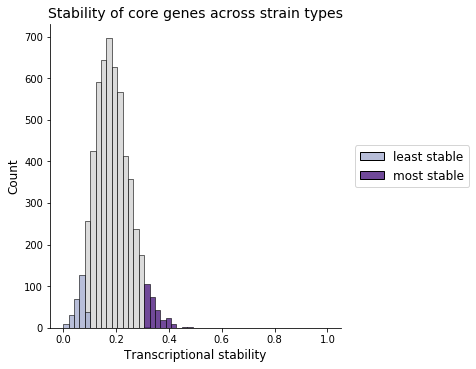

In [31]:
# Plot distribution of correlation scores
# This scores indicate how transcriptionally similar genes are across PAO1 and PA14 strains
fig_pao1 = sns.displot(
    data=corr_summary_df,
    x="Transcriptional similarity across strains",
    hue="label",
    hue_order=["least stable", "most stable", ""],
    # label=["", "least stable", "most stable"],
    palette={"": "lightgrey", "least stable": "#a6aed0ff", "most stable": "#4e1c80"},
    legend=True,
    alpha=0.8,
    bins=np.linspace(0, 1, 50),
)
fig_pao1._legend.remove()

old_legend = fig_pao1._legend
handles = old_legend.legendHandles

legend = plt.legend(
    handles=[handles[0], handles[1]],
    labels=[fig_pao1._legend.texts[0].get_text(), fig_pao1._legend.texts[1].get_text()],
    bbox_to_anchor=(1.05, 0.6),
    loc="upper left",
    borderaxespad=0,
    fontsize=12,
)

plt.title("Stability of core genes across strain types", fontsize=14, y=1.1)
plt.xlabel("Transcriptional stability", fontsize=12)
plt.ylabel("Count", fontsize=12)

## Compare most stable core genes

We want to compare the most stable core genes obtained using the P. aeruginosa RNA-seq compendium vs the array compendium to validate our findings are robust.

In [32]:
# Read in RNA-seq transcriptional statistics
pao1_similarity_scores_filename = "pao1_core_similarity_associations_final_spell.tsv"

pao1_rnaseq_similarity_scores = pd.read_csv(
    pao1_similarity_scores_filename, sep="\t", header=0, index_col=0
)

In [33]:
# Check overlap of gene ids
print(len(pao1_rnaseq_similarity_scores.index))
print(len(corr_summary_df.index))

shared_core_genes = set(pao1_rnaseq_similarity_scores.index).intersection(
    corr_summary_df.index
)
print(len(shared_core_genes))

5349
5549
5339


In [34]:
# Get most and least stable core genes
rnaseq_most_stable_genes = list(
    pao1_rnaseq_similarity_scores[
        pao1_rnaseq_similarity_scores["label"] == "most stable"
    ].index
)
rnaseq_least_stable_genes = list(
    pao1_rnaseq_similarity_scores[
        pao1_rnaseq_similarity_scores["label"] == "least stable"
    ].index
)

array_most_stable_genes = list(
    corr_summary_df[corr_summary_df["label"] == "most stable"].index
)
array_least_stable_genes = list(
    corr_summary_df[corr_summary_df["label"] == "least stable"].index
)

'# Save figure\nmatplotlib.pyplot.savefig(\n    "cross_platform_venn.svg",\n    format="svg",\n    bbox_inches="tight",\n    transparent=True,\n    pad_inches=0,\n    dpi=300,\n)'

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


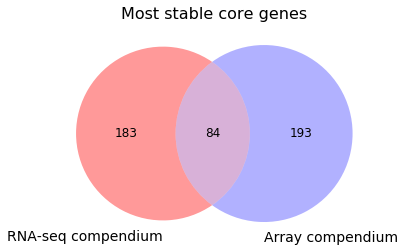

In [35]:
# Compare
most_stable_venn = venn2(
    [set(rnaseq_most_stable_genes), set(array_most_stable_genes)],
    set_labels=("RNA-seq compendium", "Array compendium"),
)

most_stable_venn.get_patch_by_id("11").set_color("purple")
most_stable_venn.get_patch_by_id("11").set_edgecolor("none")
most_stable_venn.get_patch_by_id("11").set_alpha(0.3)
most_stable_venn.get_patch_by_id("01").set_color("blue")
most_stable_venn.get_patch_by_id("01").set_edgecolor("none")
most_stable_venn.get_patch_by_id("01").set_alpha(0.3)

plt.title("Most stable core genes", fontsize=16, fontname="Verdana")
for text in most_stable_venn.set_labels:
    text.set_fontsize(14)
    text.set_fontname("Verdana")

for text in most_stable_venn.subset_labels:
    text.set_fontsize(12)
    text.set_fontname("Verdana")

"""# Save figure
matplotlib.pyplot.savefig(
    "cross_platform_venn.svg",
    format="svg",
    bbox_inches="tight",
    transparent=True,
    pad_inches=0,
    dpi=300,
)"""

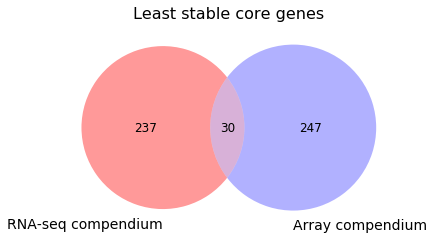

In [36]:
least_stable_venn = venn2(
    [set(rnaseq_least_stable_genes), set(array_least_stable_genes)],
    set_labels=("RNA-seq compendium", "Array compendium"),
)

least_stable_venn.get_patch_by_id("11").set_color("purple")
least_stable_venn.get_patch_by_id("11").set_edgecolor("none")
least_stable_venn.get_patch_by_id("11").set_alpha(0.3)
least_stable_venn.get_patch_by_id("01").set_color("blue")
least_stable_venn.get_patch_by_id("01").set_edgecolor("none")
least_stable_venn.get_patch_by_id("01").set_alpha(0.3)

plt.title("Least stable core genes", fontsize=16, fontname="Verdana")
for text in least_stable_venn.set_labels:
    text.set_fontsize(14)
    text.set_fontname("Verdana")

for text in least_stable_venn.subset_labels:
    text.set_fontsize(12)
    text.set_fontname("Verdana")


"""# Save figure
matplotlib.pyplot.savefig(
    "cross_platform_venn.svg",
    format="svg",
    bbox_inches="tight",
    transparent=True,
    pad_inches=0,
    dpi=300,
)"""

In [37]:
"""# Save
fig_pao1.savefig(
    pao1_similarity_dist_filename,
    format="svg",
    bbox_inches="tight",
    transparent=True,
    pad_inches=0,
    dpi=300,
)"""

'# Save\nfig_pao1.savefig(\n    pao1_similarity_dist_filename,\n    format="svg",\n    bbox_inches="tight",\n    transparent=True,\n    pad_inches=0,\n    dpi=300,\n)'

In [38]:
"""# Save transcriptional similarity df
pao1_corr_df.to_csv(pao1_similarity_scores_filename, sep="\t")
pa14_corr_df.to_csv(pa14_similarity_scores_filename, sep="\t")"""

'# Save transcriptional similarity df\npao1_corr_df.to_csv(pao1_similarity_scores_filename, sep="\t")\npa14_corr_df.to_csv(pa14_similarity_scores_filename, sep="\t")'